In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
df.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
df.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [7]:
df.location.value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [8]:
df.society.value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [9]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [10]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [11]:
df.drop(columns=['availability','society'],inplace=True)

In [12]:
df.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [13]:
# help(df.fillna)

In [14]:
median = df.balcony.median()
df['balcony'] = df['balcony'].fillna(median)

In [15]:
df['bath']= df['bath'].fillna(df.bath.median())
df.dropna(inplace=True)
df.shape

(13303, 7)

In [16]:
df

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,2.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [17]:
df.drop(columns='area_type', inplace=True)

In [18]:
df

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,2.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [19]:
# create new column bhk and seprate 2 BHK kind of values. Fill the bhk column with numbers only

df['bhk']= df['size'].apply(lambda x : int(x.split(' ')[0]))
df.drop(columns='size',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13303 non-null  object 
 1   total_sqft  13303 non-null  object 
 2   bath        13303 non-null  float64
 3   balcony     13303 non-null  float64
 4   price       13303 non-null  float64
 5   bhk         13303 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 727.5+ KB


In [20]:
df.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [21]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

df[~df['total_sqft'].apply(is_float)]

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,3010 - 3410,2.0,2.0,192.000,4
81,Hennur Road,2957 - 3450,2.0,2.0,224.500,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
...,...,...,...,...,...,...
12990,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,1200 - 1470,2.0,0.0,72.760,2
13240,Devanahalli,1020 - 1130,2.0,2.0,52.570,1
13265,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [22]:
def sqft_to_num(x):
    tokens = x.split('-')
    if tokens==2:
        return (float(token[0])+ float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

df1 = df.copy()

In [23]:
df1.total_sqft = df1.total_sqft.apply(sqft_to_num)
df1

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13316,Richards Town,3600.0,5.0,2.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [24]:
df1.isnull().sum()

location        0
total_sqft    239
bath            0
balcony         0
price           0
bhk             0
dtype: int64

In [25]:
df1=df1.dropna()
df1

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13316,Richards Town,3600.0,5.0,2.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [26]:
# calcualte price/sq feet
df1['price_per_sqft'] = round(df1['price']*100000/df1['total_sqft'],2)
df1.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.00


In [27]:
# cleaning location 

len(df1.location.unique())

1298

In [28]:
location_stats = df1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield             517
Sarjapur  Road         387
Electronic City        302
Kanakpura Road         264
Thanisandra            222
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1298, dtype: int64

In [29]:
locations_less_than_10 = location_stats[location_stats<=10]
len(locations_less_than_10)

1059

In [30]:
df1.location = df1.location.apply(lambda x: 'others' if x in locations_less_than_10 else x)
len(df1.location.unique())

240

In [31]:
df1.head(10)

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.00
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.86
6,Old Airport Road,2732.0,4.0,2.0,204.00,4,7467.06
7,Rajaji Nagar,3300.0,4.0,2.0,600.00,4,18181.82
8,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.24
9,others,1020.0,6.0,2.0,370.00,6,36274.51


In [32]:
# calculate sqft per room total_sqft/bhk. there will be average value for sqft per room. if it is less than average then
# the information is not correct
#  for now we take swft/room as 300

len(df1[df1.total_sqft/df1.bhk < 300])

744

so 744 entries are those whose sqft/room is less than 300. that means either the info is fake or there is some error. These are outliers

In [33]:
# removing outliers
df2 = df1[~(df1.total_sqft/df1.bhk < 300)] # ~means it will do the opposite 
df2

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.00
...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.83
13316,others,3600.0,5.0,2.0,400.00,4,11111.11
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.55
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.34


In [34]:
df2.price_per_sqft.describe()

count     12320.000000
mean       6323.432543
std        4186.147403
min         267.830000
25%        4209.342500
50%        5300.000000
75%        6938.555000
max      176470.590000
Name: price_per_sqft, dtype: float64

In [35]:
# as we thata their are certain values like 176470 and 267 price/sqft which are like extremely low or high. 
# so to remove these extreme values we have to calcualte mean and std
# we will keep all the values between mean-1*std and mean+1*std. we can have 2*std also as per requirement

def price_per_sqft_outliers(df):
    df_out = pd.DataFrame()
    for key,sub_df in df.groupby('location'):
        m = np.mean(sub_df.price_per_sqft)
        std = np.std(sub_df.price_per_sqft)
        reduced_df = sub_df[(sub_df.price_per_sqft > (m-std)) & (sub_df.price_per_sqft < (m+std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out


In [36]:
df3 = price_per_sqft_outliers(df2)
df3

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Devarachikkanahalli,1250.0,2.0,3.0,44.00,3,3520.00
1,Devarachikkanahalli,1250.0,2.0,2.0,40.00,2,3200.00
2,Devarachikkanahalli,1200.0,2.0,2.0,83.00,2,6916.67
3,Devarachikkanahalli,1170.0,2.0,2.0,40.00,2,3418.80
4,Devarachikkanahalli,1425.0,2.0,2.0,65.00,3,4561.40
...,...,...,...,...,...,...,...
10150,others,1353.0,2.0,2.0,110.00,2,8130.08
10151,others,812.0,1.0,0.0,26.00,1,3201.97
10152,others,1440.0,2.0,2.0,63.93,3,4439.58
10153,others,1075.0,2.0,2.0,48.00,2,4465.12


In [37]:
# removing all the outliers where the mean value of price/sqft of bhk is less than the mean value of price/sqft of bhk-1 
# if mean price of 2bhk is less than the mean price of 1 bhk in the same location then it is a outlier. Because same place 
# cannot have 2bhk in lesser price than 1bhk

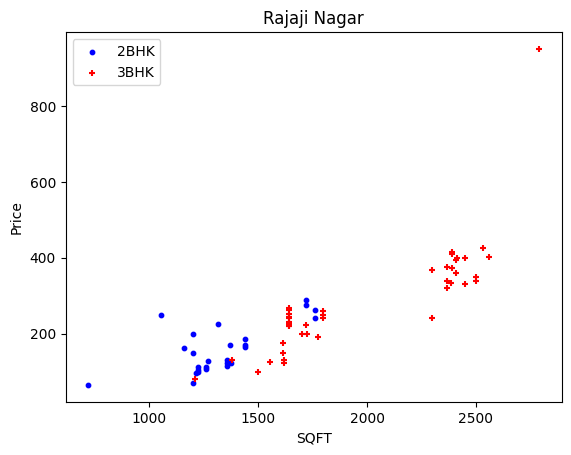

In [38]:
def bhk_plot(df, location):
    bhk2 = df[(df['location']==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location)&(df.bhk==3)]
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2BHK',s=10)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='red', marker='+',label='3BHK',s=20)
    plt.xlabel('SQFT')
    plt.ylabel('Price')
    plt.legend()
    plt.title(location)
    plt.show()
bhk_plot(df2,'Rajaji Nagar')

here we can see the price of some 2bhk is higher than the 3bhk for same sqft. so the 3bhk having less price than the mean of 2bhk in rajaji nagar are outliers.

In [39]:
def bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')
df4 = bhk_outliers(df3)
df4

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.00
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,6916.67
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,3418.80
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,4561.40
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,4540.65
...,...,...,...,...,...,...,...
10146,others,1200.0,2.0,3.0,70.0,2,5833.33
10147,others,1800.0,1.0,1.0,200.0,1,11111.11
10150,others,1353.0,2.0,2.0,110.0,2,8130.08
10151,others,812.0,1.0,0.0,26.0,1,3201.97


here we have removed all the outliers of bhk

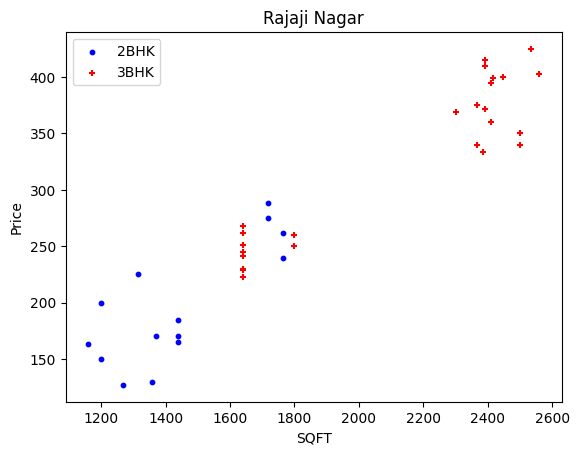

In [40]:
bhk_plot(df4, 'Rajaji Nagar')

<Axes: xlabel='price_per_sqft', ylabel='Count'>

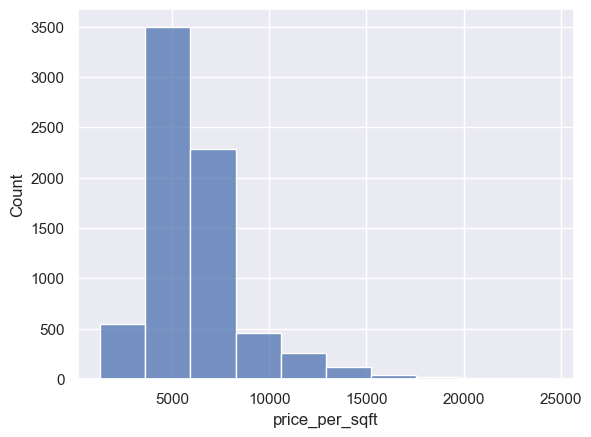

In [41]:
sns.set()
sns.histplot(df4.price_per_sqft, bins=10)

In [42]:
df4[df4.bath>10]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
5214,Neeladri Nagar,4000.0,12.0,2.0,160.0,10,4000.00
8385,others,12000.0,12.0,2.0,525.0,10,4375.00
8474,others,10000.0,16.0,2.0,550.0,16,5500.00
9215,others,6000.0,12.0,2.0,150.0,11,2500.00
9546,others,5425.0,13.0,0.0,275.0,13,5069.12


<Axes: xlabel='bath', ylabel='Count'>

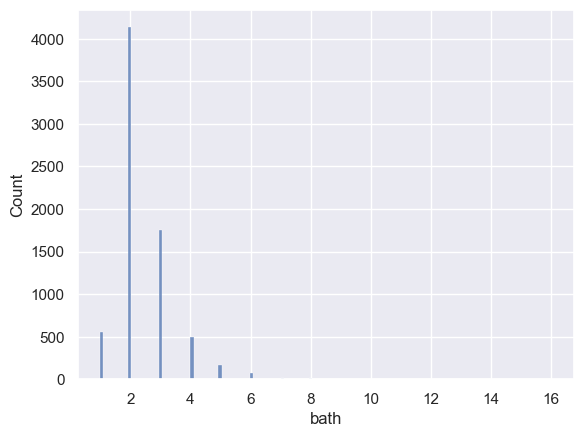

In [43]:
sns.histplot(df4.bath)


In [44]:
df5 = df4[df4.bath < df4.bhk+2]
df5

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.00
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,6916.67
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,3418.80
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,4561.40
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,4540.65
...,...,...,...,...,...,...,...
10146,others,1200.0,2.0,3.0,70.0,2,5833.33
10147,others,1800.0,1.0,1.0,200.0,1,11111.11
10150,others,1353.0,2.0,2.0,110.0,2,8130.08
10151,others,812.0,1.0,0.0,26.0,1,3201.97


<Axes: xlabel='balcony', ylabel='Count'>

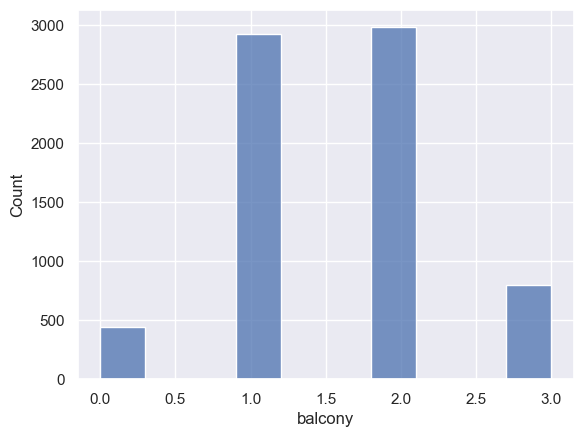

In [45]:
sns.histplot(df5.balcony, bins=10)

In [46]:
df5.drop(columns=['price_per_sqft','balcony'], axis=1,inplace=True)
df5

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2
...,...,...,...,...,...
10146,others,1200.0,2.0,70.0,2
10147,others,1800.0,1.0,200.0,1
10150,others,1353.0,2.0,110.0,2
10151,others,812.0,1.0,26.0,1


In [47]:
dummies = pd.get_dummies(df5.location)
df6 = pd.concat([df5,dummies], axis='columns')
df6.drop(columns='location',inplace=True)
df6.drop(columns='others',inplace=True)
df6.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
X = df6.drop(columns='price')
y = df6.price

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)


In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.8345056853640123

In [51]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
cv = ShuffleSplit(n_splits=10,test_size=0.2)
cross_val_score(lr, X,y, cv=cv)

array([0.79628053, 0.85777419, 0.84402943, 0.84885374, 0.8493175 ,
       0.79368025, 0.80565214, 0.86236449, 0.83937209, 0.82148565])

In [52]:
X.columns

Index(['total_sqft', 'bath', 'bhk', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=242)

In [53]:
def predict_price(location,sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] =sqft
    x[1]=bath
    x[2]=bhk
    
    if loc_index >= 0:
        x[loc_index]=1
    
    return round(lr.predict([x])[0],3)

In [54]:
predict_price('1st Phase JP Nagar',1000, 2, 2)


86.601

In [55]:
predict_price('2nd Phase Judicial Layout', 1000,2,3)

15.599

In [56]:
predict_price('Indira Nagar', 1000,2,3)

160.002

Exporting the model using pickle file

In [57]:
import pickle
with open('Bengaluru_House_Data.pickle','wb') as f:
    pickle.dump(lr,f)

Exporting the column Info using Json file

In [58]:
import json
columns ={
    'data_columns':[col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))